In [2]:
#this uses iPython magic to make plots appear inline
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import sys
import numpy as np
import matplotlib.patches as patches
import gzip
import fileinput

def count_lines(f):
    lineCount = 0
    with open(f, 'r') as f:
        for line in f:
            lineCount += 1
        return lineCount
def runCMD(cmd):
    val = subprocess.Popen(cmd, shell=True).wait()
    if val == 0:
        pass
    else:
        print ('command failed')
        print (cmd)
        sys.exit(1)

In [1]:
inDir = '/home/ampend/links/kidd-lab/ampend-projects/Angela/Simulations/input/'
mafDir = '/home/ampend/links/kidd-lab/ampend-projects/Angela/Simulations/input/MAF/'

In [3]:
def get_minor_allele(inFile,array):
    total_SNP_count = 0
    for line in inFile:
        line=line.rstrip().split('\t')
        if 'CHROM' in line[0]:#continue
            continue
        total_SNP_count +=1
        a1, a2 = line[4].split(':'),line[5].split(':') #split allele frequency by :
        a1count, a2count = int(a1[1]), int(a2[1]) #get the allele counts
        if a1count < a2count and a1count > 0: #minor allele == allele 1 if count is smaller
            minorCount = a1count
        if a2count < a1count and a2count > 0: #minor allele == allele 2 if count is smaller
            minorCount = a2count
        if a2count == a1count: #skip if equal
            continue
        array.append(minorCount)
    inFile.close()
    return array
##################################################################################################################
def make_histogram_cumulative_density_plot(ma_real,ma_sim,avg_real,avg_sim,plotFile):
    f, axarr = plt.subplots(2, sharex=True, figsize=(10,8))

    #Histogram = subplot 1
    sc = axarr[0].hist(ma_sim,bins=30, label="Simulated SNP data",  color="orange")
    sc = axarr[0].hist(ma_real,bins=30, label="Real SNP data", color="royalblue")
    axarr[0].legend()
    axarr[0].set_title('Minor Allele Counts in Real vs Simulated Data\n Avg Real = %s     Avg Sim = %s' % ("%.2f" % avg_real, "%.2f" % avg_sim))
    axarr[0].set_ylabel('Frequency', fontsize=14)

    # Cumulative histogram = subplot 2
    n, bins, patches = axarr[1].hist(ma_real, 100, normed=1, histtype='step',
                               cumulative=True, label='Real SNP Data')
    n, bins, patches = axarr[1].hist(ma_sim, 100, normed=1, histtype='step',
                               cumulative=True, label='Simulated SNP Data')
    axarr[1].set_title('Cumulative Density Plot for Real vs Simulated SNPs')
    axarr[1].set_xlabel('Minor Allele Count per Site', fontsize=14,fontweight='bold')
    axarr[1].set_ylabel('Cumulative Probability', fontsize=14)
    axarr[1].legend(loc=2)

    #Draw plot
    f.tight_layout()
    f.savefig(plotFile)

In [4]:
#GET REAL DATA MINOR ALLELE COUNTS
infile = '/home/ampend/links/kidd-lab/ampend-projects/Angela/Simulations/input/TOTAL_villageANDwolves_autos-X.snp.indel5.autoPar.vqsr99.FILTERED_biallelic_mxb_rm.recode.frq.count'
inFile = open(infile, 'r')
ma_real = [] #clear array
ma_real = get_minor_allele(inFile, ma_real) #populate the real snp data minor allele count array
print('%i SNPs read into minor allele count array for the REAL SNP dataset' % len(ma_real))


7240888 SNPs read into minor allele count array for the REAL SNP dataset


#Simulation 0
17166503 SNPs in simulation 0 set
Average REAL dataset = 12.278183 
 Average simulated 0 dataset = 14.891646 
Minor allele count range for REAL dataset = 1-52
Minor allele count range for simulated 0 dataset = 1-52
#Simulation 1
17129519 SNPs in simulation 1 set
Average REAL dataset = 12.278183 
 Average simulated 1 dataset = 14.869868 
Minor allele count range for REAL dataset = 1-52
Minor allele count range for simulated 1 dataset = 1-52
#Simulation 2
17168380 SNPs in simulation 2 set
Average REAL dataset = 12.278183 
 Average simulated 2 dataset = 14.867490 
Minor allele count range for REAL dataset = 1-52
Minor allele count range for simulated 2 dataset = 1-52
#Simulation 3
17142094 SNPs in simulation 3 set
Average REAL dataset = 12.278183 
 Average simulated 3 dataset = 14.889086 
Minor allele count range for REAL dataset = 1-52
Minor allele count range for simulated 3 dataset = 1-52
#Simulation 4
17149981 SNPs in simulation 4 set
Average REAL dataset = 12.278183 
 A

FileNotFoundError: [Errno 2] No such file or directory: '/home/ampend/links/kidd-lab/ampend-projects/Angela/Simulations/input/FrequencyCountFiles_DogANDWolf/chr1.20.simulation.frq.count'

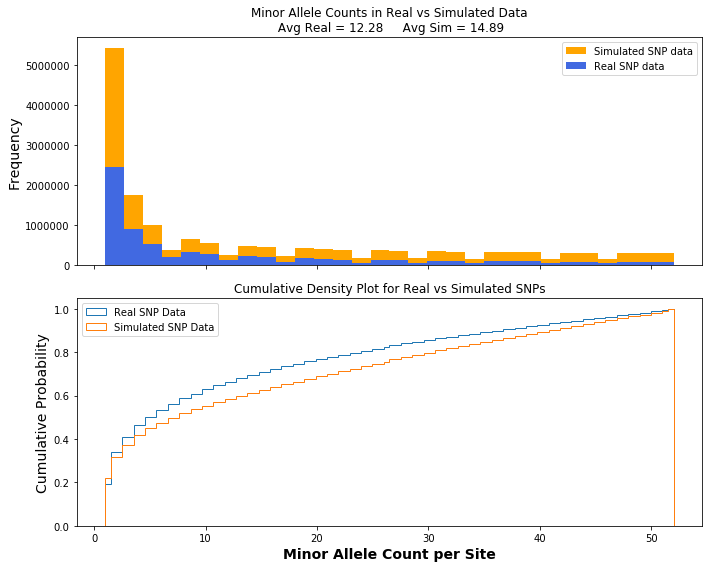

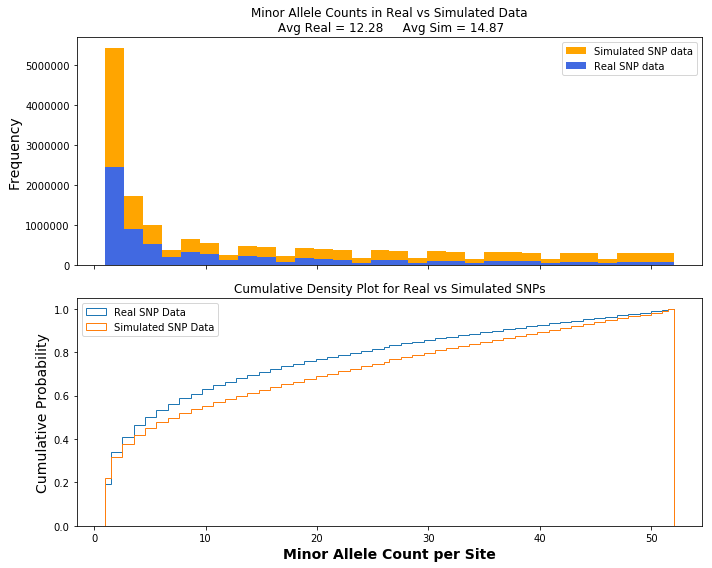

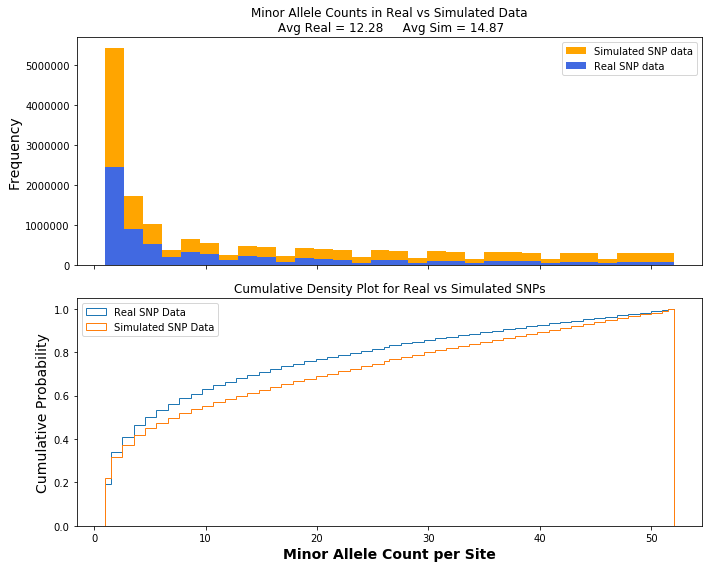

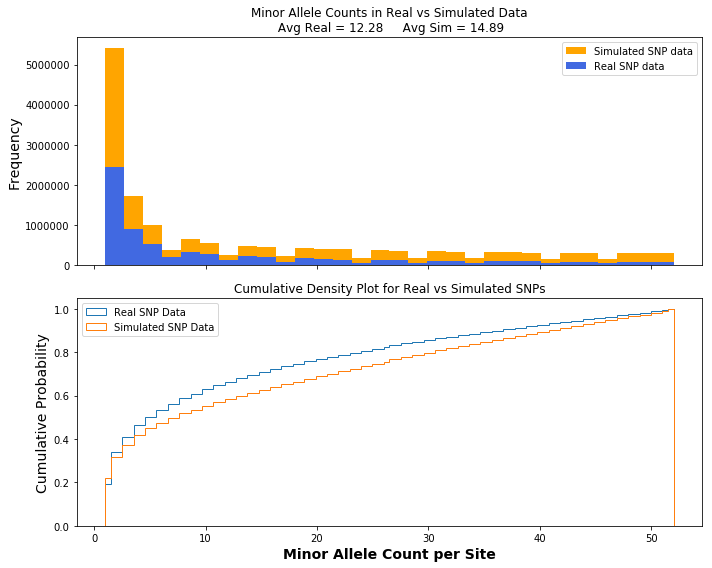

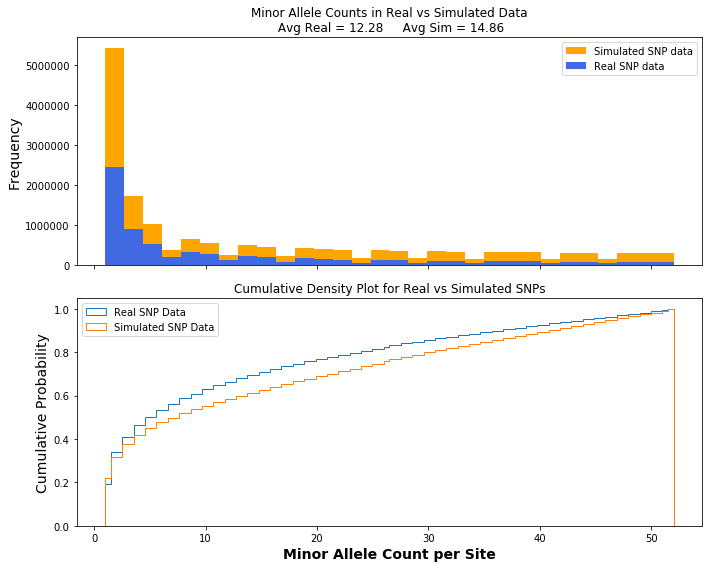

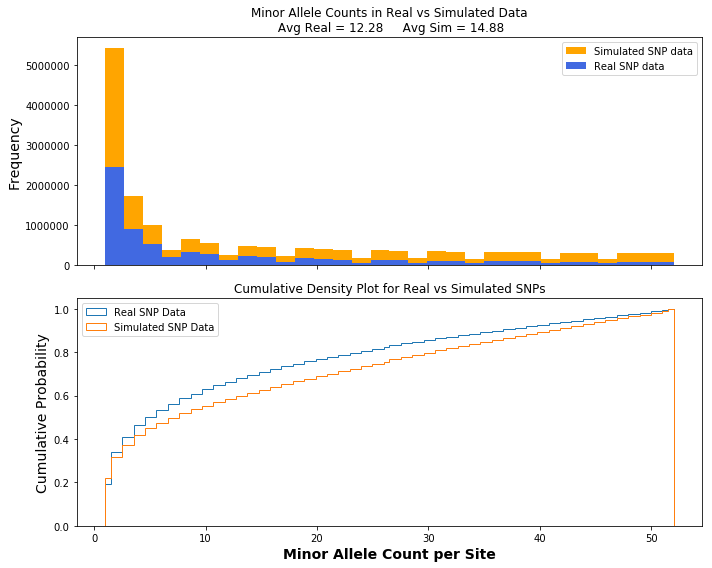

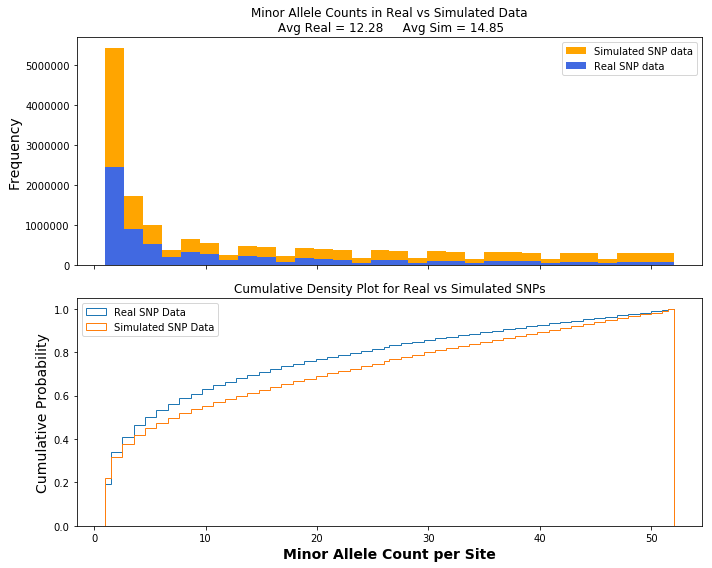

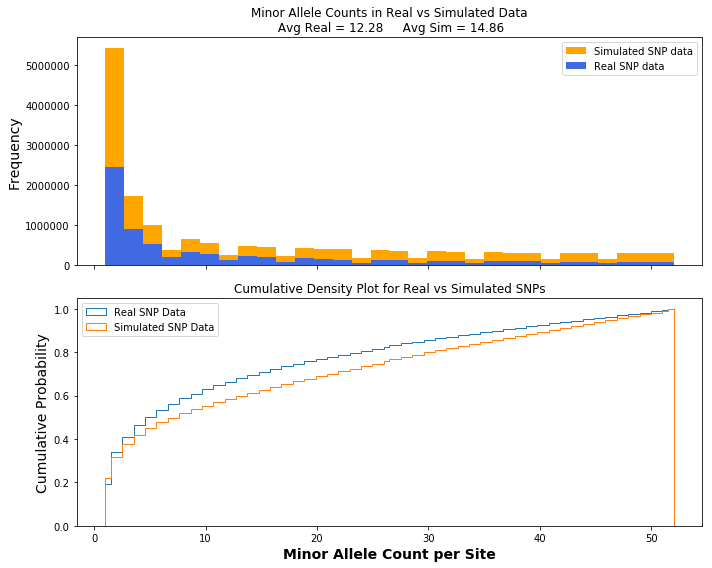

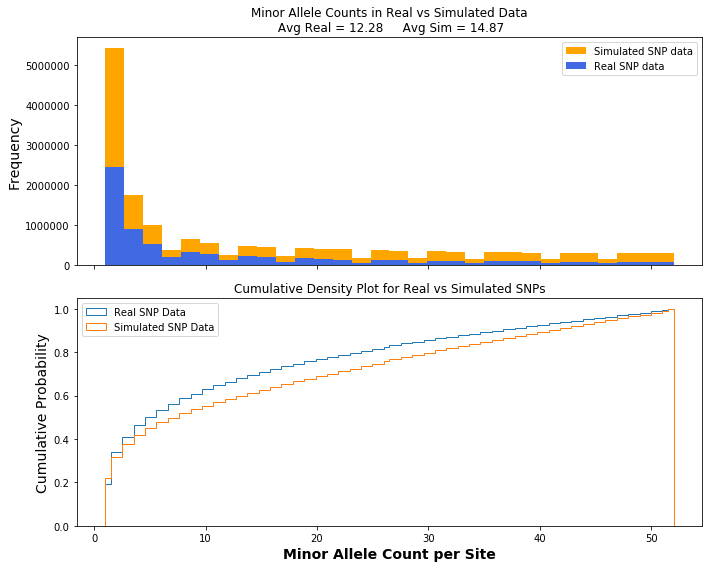

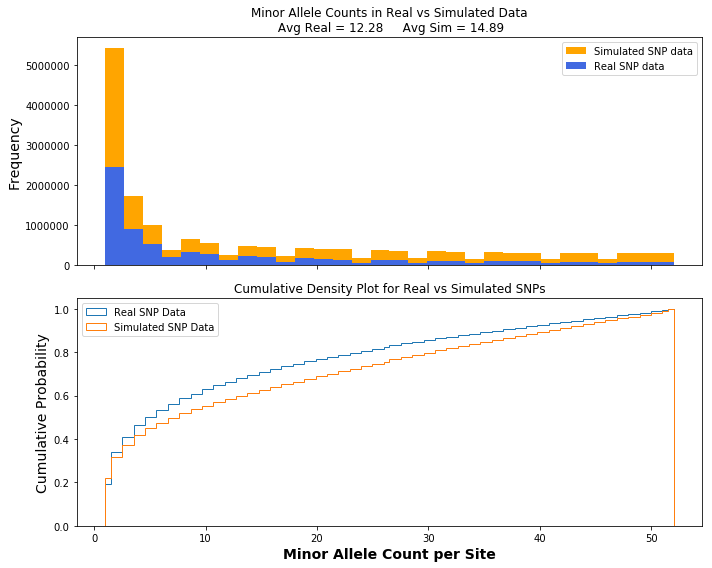

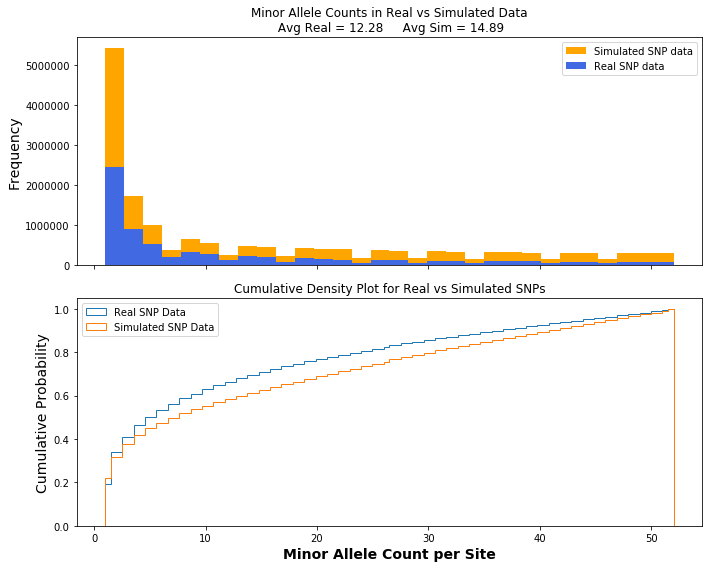

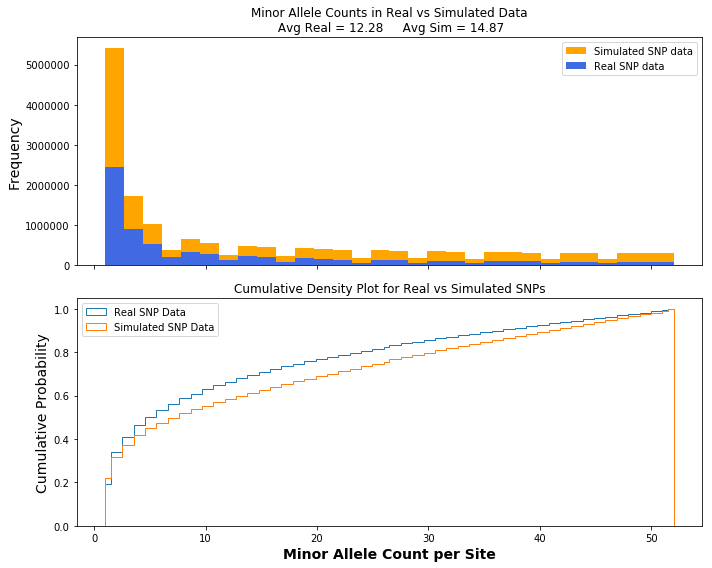

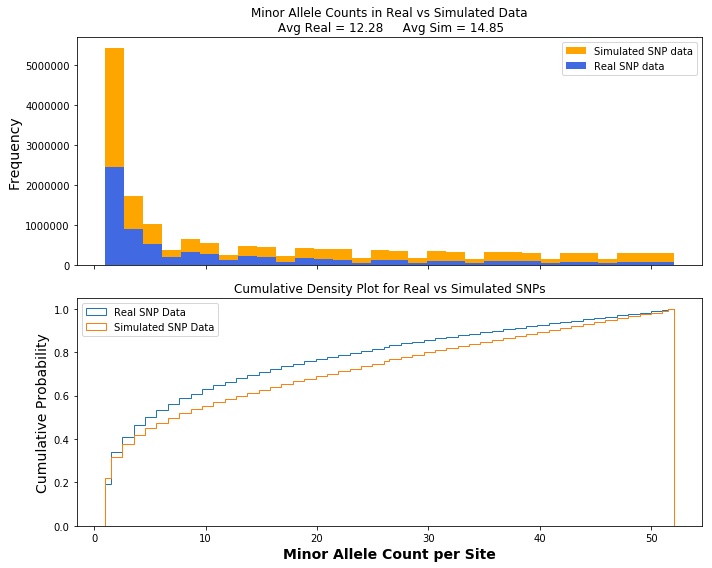

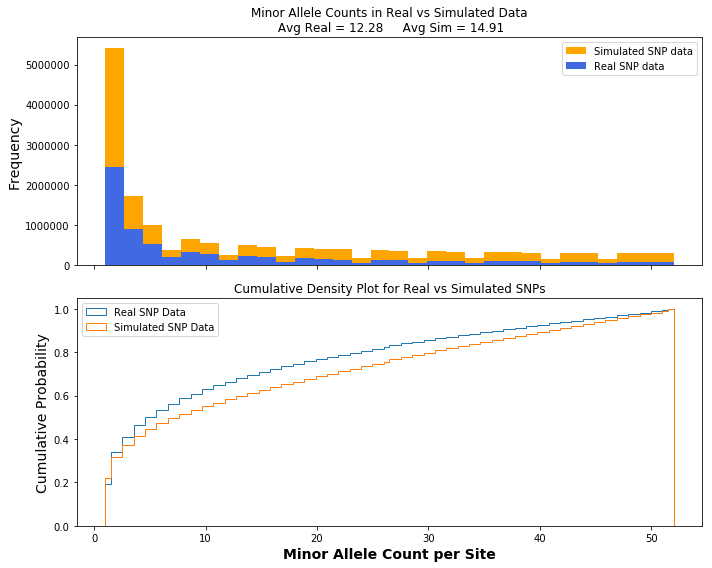

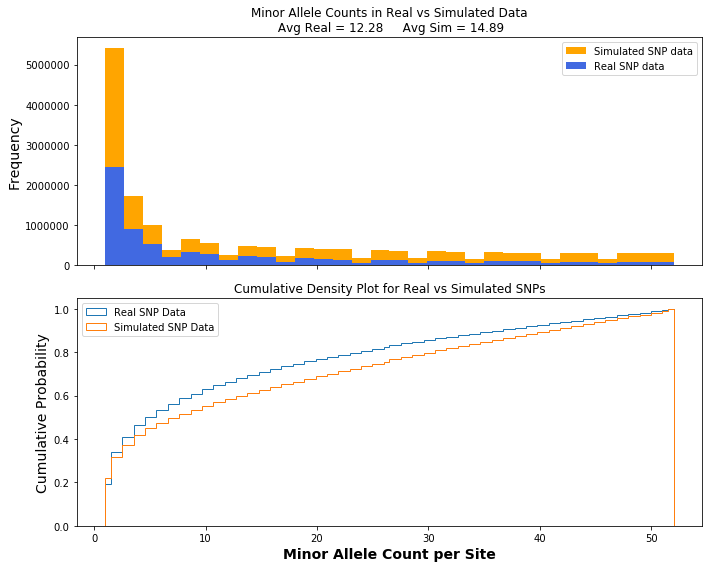

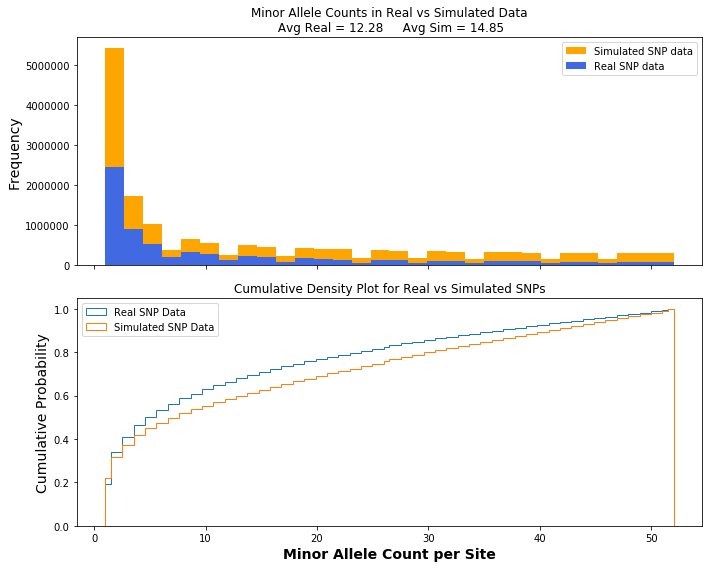

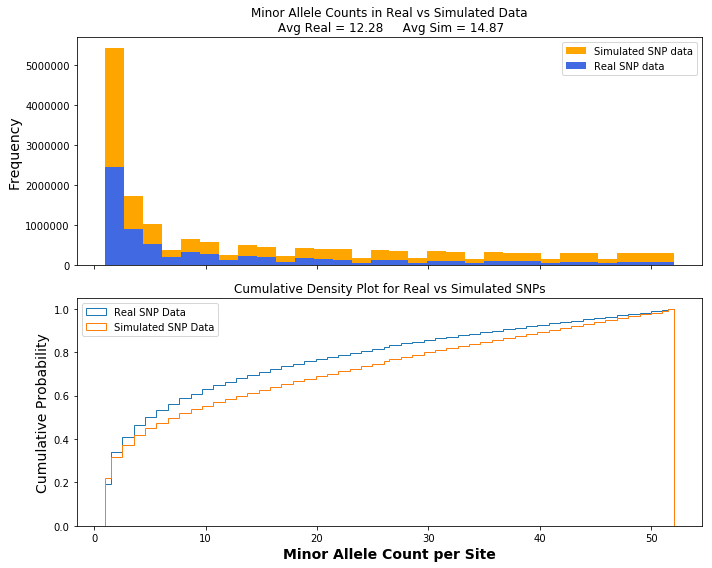

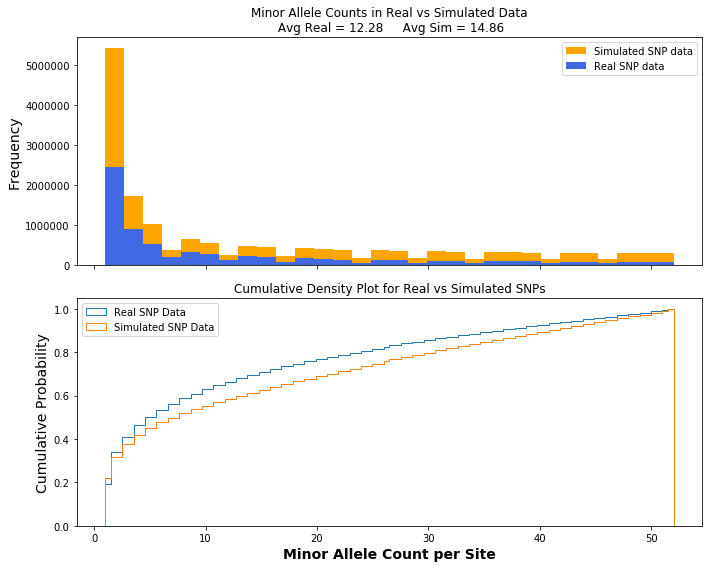

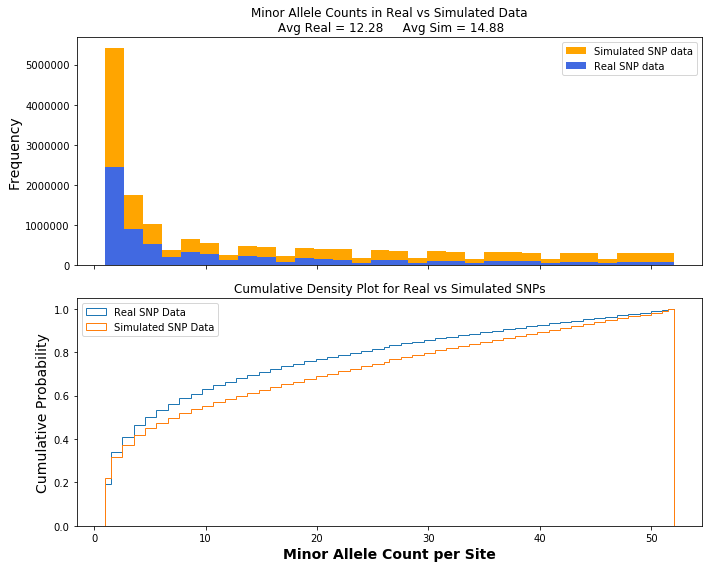

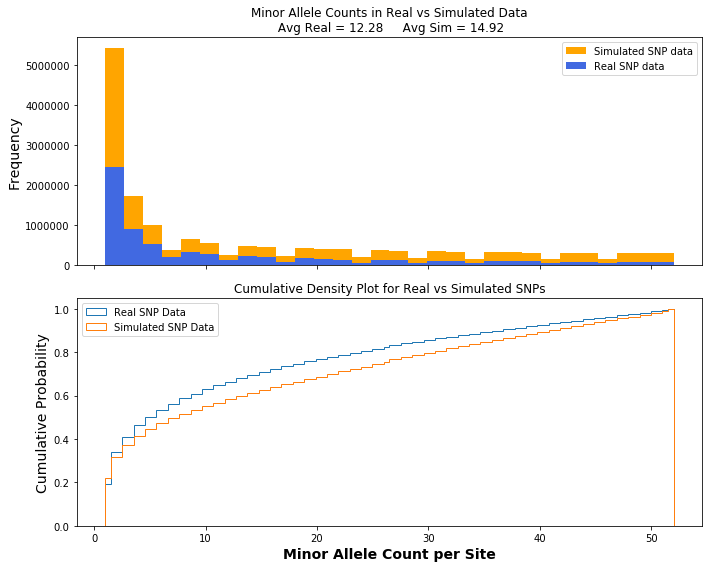

In [5]:
#GET SIMULATED DATA MINOR ALLELE COUNTS
for sim in range(0,21): #to process simulations 0-20
    print('#Simulation %i' % sim)
    ma_sim = []
    for chrom in range(1,39):
        inFile = open(inDir + 'FrequencyCountFiles_DogANDWolf/' + 'chr%i.%i.simulation.frq.count' % (chrom,sim),'r')
        get_minor_allele(inFile, ma_sim)  
    print('%i SNPs in simulation %i set' % (len(ma_sim),sim)) 
    #get stats for simulation run
    avg_real, avg_sim = np.mean(ma_real), np.mean(ma_sim)
    min_sim, max_sim = min(ma_sim),max(ma_sim)
    min_real, max_real = min(ma_real), max(ma_real)
    print('Average REAL dataset = %f \n Average simulated %i dataset = %f ' % (avg_real,sim,avg_sim))
    print('Minor allele count range for REAL dataset = %i-%i' % (min_real, max_real))
    print('Minor allele count range for simulated %i dataset = %i-%i' %(sim, min_sim, max_sim))
    
    #make histogram and cumulative density plot
    plotFile = inDir + 'MAF/' + 'plot_Simulation.%i.MinorAlleleCounts.png' % (sim)
    make_histogram_cumulative_density_plot(ma_real,ma_sim,avg_real,avg_sim,plotFile)    
print('Done!')